# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [6]:
# Series can be created from python dictionary too.
# Note that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.661613
b   -0.410476
c   -0.554141
d    0.714333
e    0.482493
dtype: float64
a         NaN
b   -0.820951
c   -1.108282
d    1.428667
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2025,11,26,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 26 2025'
# or alternatively
#date = '26/11/2025 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2025-12-29
2025-11-26 10:45:10.000015
Nov 26 2025
DatetimeIndex(['2025-11-26', '2025-11-27', '2025-11-28', '2025-11-29',
               '2025-11-30', '2025-12-01', '2025-12-02'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-11-26 00:00:00', '2025-11-26 00:00:01',
               '2025-11-26 00:00:02', '2025-11-26 00:00:03',
               '2025-11-26 00:00:04', '2025-11-26 00:00:05',
               '2025-11-26 00:00:06', '2025-11-26 00:00:07',
               '2025-11-26 00:00:08', '2025-11-26 00:00:09',
               ...
               '2025-11-26 00:59:50', '2025-11-26 00:59:51',
               '2025-11-26 00:59:52', '2025-11-26 00:59:53',
               '2025-11-26 00:59:54', '2025-11-26 00:59:55',
               '2025-11-26 00:59:56', '2025-11-26 00:59:57',
               '2025-11-26 00:59:58', '2025-11-26 00:59:59'],
              dtype='datetime64[ns]', length=3600, freq='s')


To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [10]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [12]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2025-11-26':'2025-12-02'], '\n') # Note - includes end time


2025-11-26     8.136178
2025-11-27    10.073181
2025-11-28    10.807272
2025-11-29     9.268188
Freq: D, dtype: float64 

2025-11-26     8.136178
2025-11-27    10.073181
2025-11-28    10.807272
2025-11-29     9.268188
2025-11-30    11.291843
2025-12-01    11.637521
2025-12-02    10.953169
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [11]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [16]:
entries=10
dates=pd.date_range('11/26/2025 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2025-11-26 10:45:00,-0.445185,2.338505,0.869376,-1.651748
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,0.654233
2025-11-26 12:45:00,1.747253,1.588019,0.909824,-1.268860
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,-0.915752
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,0.354697
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,0.656110
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,0.334236
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,0.937891
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,0.473976
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,0.970203


or by means of a dictionary:


In [14]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [17]:
df.head(2)

,A,B,C,D
2025-11-26 10:45:00,-0.445185,2.338505,0.869376,-1.651748
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,0.654233


In [18]:
df.tail(4)

,A,B,C,D
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,0.334236
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,0.937891
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,0.473976
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,0.970203


In [19]:
df.index

DatetimeIndex(['2025-11-26 10:45:00', '2025-11-26 11:45:00',
               '2025-11-26 12:45:00', '2025-11-26 13:45:00',
               '2025-11-26 14:45:00', '2025-11-26 15:45:00',
               '2025-11-26 16:45:00', '2025-11-26 17:45:00',
               '2025-11-26 18:45:00', '2025-11-26 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
df.values

array([[-0.44518488,  2.33850494,  0.86937572, -1.65174803],
       [ 2.01375655, -0.57948621, -0.01123199,  0.65423269],
       [ 1.74725347,  1.58801922,  0.90982414, -1.2688603 ],
       [ 1.52605508, -1.3284537 , -0.93905628, -0.9157523 ],
       [-0.28233479,  0.14254927, -0.9152876 ,  0.35469667],
       [-0.60714545, -0.2003436 , -0.30693097,  0.65610983],
       [ 1.69257354, -0.76454238,  0.09784703,  0.334236  ],
       [ 0.42931369, -1.43061901, -0.12178452,  0.93789085],
       [-2.02733141,  1.91995261,  0.89071515,  0.47397649],
       [ 0.01058501, -1.42011215, -0.25329869,  0.97020294]])

In [22]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.405754,0.026547,0.022017,0.054498
std,1.316410,1.432889,0.689170,0.959675
min,-2.027331,-1.430619,-0.939056,-1.651748
25%,-0.404472,-1.187476,-0.293523,-0.603255
50%,0.219949,-0.389915,-0.066508,0.414337
75%,1.650944,1.226652,0.676494,0.655641
max,2.013757,2.338505,0.909824,0.970203


In [23]:
df.T

,2025-11-26 10:45:00,2025-11-26 11:45:00,2025-11-26 12:45:00,2025-11-26 13:45:00,2025-11-26 14:45:00,2025-11-26 15:45:00,2025-11-26 16:45:00,2025-11-26 17:45:00,2025-11-26 18:45:00,2025-11-26 19:45:00
A,-0.445185,2.013757,1.747253,1.526055,-0.282335,-0.607145,1.692574,0.429314,-2.027331,0.010585
B,2.338505,-0.579486,1.588019,-1.328454,0.142549,-0.200344,-0.764542,-1.430619,1.919953,-1.420112
C,0.869376,-0.011232,0.909824,-0.939056,-0.915288,-0.306931,0.097847,-0.121785,0.890715,-0.253299
D,-1.651748,0.654233,-1.268860,-0.915752,0.354697,0.656110,0.334236,0.937891,0.473976,0.970203


In [24]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,0.970203
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,0.473976
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,0.937891
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,0.334236
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,0.656110
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,0.354697
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,-0.915752
2025-11-26 12:45:00,1.747253,1.588019,0.909824,-1.268860
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,0.654233
2025-11-26 10:45:00,-0.445185,2.338505,0.869376,-1.651748


In [25]:
df.sort_values(by="C")

,A,B,C,D
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,-0.915752
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,0.354697
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,0.656110
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,0.970203
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,0.937891
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,0.654233
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,0.334236
2025-11-26 10:45:00,-0.445185,2.338505,0.869376,-1.651748
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,0.473976
2025-11-26 12:45:00,1.747253,1.588019,0.909824,-1.268860


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [26]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2025-11-26 10:45:00   -0.445185
2025-11-26 11:45:00    2.013757
2025-11-26 12:45:00    1.747253
2025-11-26 13:45:00    1.526055
2025-11-26 14:45:00   -0.282335
2025-11-26 15:45:00   -0.607145
2025-11-26 16:45:00    1.692574
2025-11-26 17:45:00    0.429314
2025-11-26 18:45:00   -2.027331
2025-11-26 19:45:00    0.010585
Freq: h, Name: A, dtype: float64 

2025-11-26 10:45:00   -0.445185
2025-11-26 11:45:00    2.013757
2025-11-26 12:45:00    1.747253
2025-11-26 13:45:00    1.526055
2025-11-26 14:45:00   -0.282335
2025-11-26 15:45:00   -0.607145
2025-11-26 16:45:00    1.692574
2025-11-26 17:45:00    0.429314
2025-11-26 18:45:00   -2.027331
2025-11-26 19:45:00    0.010585
Freq: h, Name: A, dtype: float64


In [27]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2025-11-26 10:45:00":"2025-11-26 12:45:00"])

                            A         B         C         D
2025-11-26 10:45:00 -0.445185  2.338505  0.869376 -1.651748
2025-11-26 11:45:00  2.013757 -0.579486 -0.011232  0.654233
2025-11-26 12:45:00  1.747253  1.588019  0.909824 -1.268860
                            A         B         C         D
2025-11-26 10:45:00 -0.445185  2.338505  0.869376 -1.651748
2025-11-26 11:45:00  2.013757 -0.579486 -0.011232  0.654233
2025-11-26 12:45:00  1.747253  1.588019  0.909824 -1.268860


### Selection by label

In [28]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.445185
B    2.338505
C    0.869376
D   -1.651748
Name: 2025-11-26 10:45:00, dtype: float64

In [29]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2025-11-26 10:45:00,-0.445185,2.338505
2025-11-26 11:45:00,2.013757,-0.579486
2025-11-26 12:45:00,1.747253,1.588019
2025-11-26 13:45:00,1.526055,-1.328454
2025-11-26 14:45:00,-0.282335,0.142549
2025-11-26 15:45:00,-0.607145,-0.200344
2025-11-26 16:45:00,1.692574,-0.764542
2025-11-26 17:45:00,0.429314,-1.430619
2025-11-26 18:45:00,-2.027331,1.919953
2025-11-26 19:45:00,0.010585,-1.420112


In [30]:
# showing label slicing, both endpoints are included:
df.loc['2025-11-26 14:45:00':'2025-11-26 16:45:00',['A','B']]

,A,B
2025-11-26 14:45:00,-0.282335,0.142549
2025-11-26 15:45:00,-0.607145,-0.200344
2025-11-26 16:45:00,1.692574,-0.764542


In [31]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

2.013756549846672
2.013756549846672


### Selecting by position

In [32]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.526055
B   -1.328454
C   -0.939056
D   -0.915752
Name: 2025-11-26 13:45:00, dtype: float64 

                            A         B
2025-11-26 13:45:00  1.526055 -1.328454
2025-11-26 14:45:00 -0.282335  0.142549


In [33]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2025-11-26 11:45:00,2.013757,-0.011232
2025-11-26 12:45:00,1.747253,0.909824
2025-11-26 14:45:00,-0.282335,-0.915288


In [34]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

                            A         B         C         D
2025-11-26 11:45:00  2.013757 -0.579486 -0.011232  0.654233
2025-11-26 12:45:00  1.747253  1.588019  0.909824 -1.268860 

                            B         C
2025-11-26 10:45:00  2.338505  0.869376
2025-11-26 11:45:00 -0.579486 -0.011232
2025-11-26 12:45:00  1.588019  0.909824
2025-11-26 13:45:00 -1.328454 -0.939056
2025-11-26 14:45:00  0.142549 -0.915288
2025-11-26 15:45:00 -0.200344 -0.306931
2025-11-26 16:45:00 -0.764542  0.097847
2025-11-26 17:45:00 -1.430619 -0.121785
2025-11-26 18:45:00  1.919953  0.890715
2025-11-26 19:45:00 -1.420112 -0.253299
-0.5794862119743068


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [35]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2025-11-26 10:45:00,-0.445185,2.338505,0.869376,-1.651748
2025-11-26 12:45:00,1.747253,1.588019,0.909824,-1.268860
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,0.354697
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,0.473976


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2025-11-26 10:45:00,1.542848,NaN,NaN,NaN
2025-11-26 11:45:00,NaN,NaN,NaN,NaN
2025-11-26 12:45:00,1.534307,NaN,1.520726,2.058371
2025-11-26 13:45:00,0.597568,1.576310,0.450003,0.175586
2025-11-26 14:45:00,NaN,NaN,0.288872,0.519996
2025-11-26 15:45:00,0.266993,0.009600,1.021612,NaN
2025-11-26 16:45:00,NaN,0.221228,NaN,0.227665
2025-11-26 17:45:00,NaN,0.244607,0.027618,NaN
2025-11-26 18:45:00,0.835104,1.024758,NaN,0.789592
2025-11-26 19:45:00,0.861473,NaN,2.260701,2.603620


### Setting

Combination of selection and setting of values

In [36]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,5.0,0.5,2
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,5.0,1.5,6
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,5.0,2.0,8
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,5.0,2.5,10
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,5.0,3.0,12
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,5.0,3.5,14
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,5.0,4.0,16
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,5.0,4.5,18


In [37]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,5.0,0.5,2,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,5.0,2.0,8,0.999391
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,5.0,4.5,18,0.996917


In [38]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-2.338505,-0.869376,-5.0,0.0,0,-1.000000
2025-11-26 11:45:00,-2.013757,-0.579486,-0.011232,-5.0,-0.5,-2,-0.999962
2025-11-26 12:45:00,-1.747253,-1.588019,-0.909824,-5.0,-1.0,-4,-0.999848
2025-11-26 13:45:00,-1.526055,-1.328454,-0.939056,-5.0,-1.5,-6,-0.999657
2025-11-26 14:45:00,-0.282335,-0.142549,-0.915288,-5.0,-2.0,-8,-0.999391
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,-5.0,-2.5,-10,-0.999048
2025-11-26 16:45:00,-1.692574,-0.764542,-0.097847,-5.0,-3.0,-12,-0.998630
2025-11-26 17:45:00,-0.429314,-1.430619,-0.121785,-5.0,-3.5,-14,-0.998135
2025-11-26 18:45:00,-2.027331,-1.919953,-0.890715,-5.0,-4.0,-16,-0.997564
2025-11-26 19:45:00,-0.010585,-1.420112,-0.253299,-5.0,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [39]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)



     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `dfd["a"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [40]:
dfd["a"][dfd["b"] > 5] = 100
dfd

C:\Users\Utente\AppData\Local\Temp\ipykernel_30128\449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With copy on write this can be done by using `loc`

In [41]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [42]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,1.000000
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,5.0,0.5,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,0.999848
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,5.0,1.5,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,5.0,2.0,0.999391
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,5.0,2.5,0.999048
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,5.0,3.0,0.998630
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,5.0,3.5,0.998135
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,5.0,4.0,0.997564
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,5.0,4.5,0.996917


In [43]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,5.0,4.5,18,0.996917


In [44]:
df

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,5.0,0.5,2,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,5.0,2.0,8,0.999391
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,5.0,4.5,18,0.996917


In [45]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2025-11-26 18:45:00"))

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,5.0,0.5,2,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,5.0,2.0,8,0.999391
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,5.0,3.5,14,0.998135
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [46]:
df_wNan = df[df>-0.5]
df_wNan

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,NaN,-0.011232,5.0,0.5,2,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848
2025-11-26 13:45:00,1.526055,NaN,NaN,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,NaN,5.0,2.0,8,0.999391
2025-11-26 15:45:00,NaN,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,NaN,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,NaN,-0.121785,5.0,3.5,14,0.998135
2025-11-26 18:45:00,NaN,1.919953,0.890715,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.010585,NaN,-0.253299,5.0,4.5,18,0.996917


In [47]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848


In [48]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,False,False,False,False,False,False,False
2025-11-26 11:45:00,False,True,False,False,False,False,False
2025-11-26 12:45:00,False,False,False,False,False,False,False
2025-11-26 13:45:00,False,True,True,False,False,False,False
2025-11-26 14:45:00,False,False,True,False,False,False,False
2025-11-26 15:45:00,True,False,False,False,False,False,False
2025-11-26 16:45:00,False,True,False,False,False,False,False
2025-11-26 17:45:00,False,True,False,False,False,False,False
2025-11-26 18:45:00,True,False,False,False,False,False,False
2025-11-26 19:45:00,False,True,False,False,False,False,False


In [49]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,0.000000,-0.011232,5.0,0.5,2,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848
2025-11-26 13:45:00,1.526055,0.000000,0.000000,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,0.000000,5.0,2.0,8,0.999391
2025-11-26 15:45:00,0.000000,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,0.000000,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,0.000000,-0.121785,5.0,3.5,14,0.998135
2025-11-26 18:45:00,0.000000,1.919953,0.890715,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.010585,0.000000,-0.253299,5.0,4.5,18,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [50]:
#df_wNan.fillna(method='pad')
df_wNan.ffill()

#this propagates the previous number in the column to the position in which there is NaN. Just compare this dataframe with the previous one.

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,2.338505,-0.011232,5.0,0.5,2,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848
2025-11-26 13:45:00,1.526055,1.588019,0.909824,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,0.909824,5.0,2.0,8,0.999391
2025-11-26 15:45:00,-0.282335,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,-0.200344,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,-0.200344,-0.121785,5.0,3.5,14,0.998135
2025-11-26 18:45:00,0.429314,1.919953,0.890715,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.010585,1.919953,-0.253299,5.0,4.5,18,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [51]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.450273
B          0.026547
C          0.022017
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2025-11-26 10:45:00    1.315412
2025-11-26 11:45:00    1.417571
2025-11-26 12:45:00    2.177849
2025-11-26 13:45:00    1.822600
2025-11-26 14:45:00    2.134903
2025-11-26 15:45:00    2.483518
2025-11-26 16:45:00    3.146358
2025-11-26 17:45:00    3.196435
2025-11-26 18:45:00    3.825843
2025-11-26 19:45:00    3.833442
Freq: h, dtype: float64 



In [52]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,1.759019,0.858144,10.0,0.5,2,1.999962
2025-11-26 12:45:00,3.761010,3.347038,1.767968,15.0,1.5,6,2.999810
2025-11-26 13:45:00,5.287065,2.018584,0.828912,20.0,3.0,12,3.999467
2025-11-26 14:45:00,5.004730,2.161134,-0.086376,25.0,5.0,20,4.998858
2025-11-26 15:45:00,4.397585,1.960790,-0.393307,30.0,7.5,30,5.997906
2025-11-26 16:45:00,6.090158,1.196248,-0.295460,35.0,10.5,42,6.996536
2025-11-26 17:45:00,6.519472,-0.234371,-0.417244,40.0,14.0,56,7.994670
2025-11-26 18:45:00,4.492141,1.685581,0.473471,45.0,18.0,72,8.992234
2025-11-26 19:45:00,4.502726,0.265469,0.220172,50.0,22.5,90,9.989152


In [53]:
df

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,2.338505,0.869376,5.0,0.0,0,1.000000
2025-11-26 11:45:00,2.013757,-0.579486,-0.011232,5.0,0.5,2,0.999962
2025-11-26 12:45:00,1.747253,1.588019,0.909824,5.0,1.0,4,0.999848
2025-11-26 13:45:00,1.526055,-1.328454,-0.939056,5.0,1.5,6,0.999657
2025-11-26 14:45:00,-0.282335,0.142549,-0.915288,5.0,2.0,8,0.999391
2025-11-26 15:45:00,-0.607145,-0.200344,-0.306931,5.0,2.5,10,0.999048
2025-11-26 16:45:00,1.692574,-0.764542,0.097847,5.0,3.0,12,0.998630
2025-11-26 17:45:00,0.429314,-1.430619,-0.121785,5.0,3.5,14,0.998135
2025-11-26 18:45:00,-2.027331,1.919953,0.890715,5.0,4.0,16,0.997564
2025-11-26 19:45:00,0.010585,-1.420112,-0.253299,5.0,4.5,18,0.996917


In [54]:
df.apply(lambda x: x.max() - x.min())

A           4.041088
B           3.769124
C           1.848880
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [55]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2025-11-26 10:45:00    2.338505
2025-11-26 11:45:00    1.434270
2025-11-26 12:45:00    3.335273
2025-11-26 13:45:00    0.197601
2025-11-26 14:45:00   -0.139786
2025-11-26 15:45:00   -0.807489
2025-11-26 16:45:00    0.928031
2025-11-26 17:45:00   -1.001305
2025-11-26 18:45:00   -0.107379
2025-11-26 19:45:00   -1.409527
Freq: h, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [57]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [60]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,19061.666667
1310716,1,1,4,3869211171,763,11,19084.166667
1310717,1,0,64,3869211171,764,0,19100.000000
1310718,1,0,139,3869211171,769,0,19225.000000


In [59]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [61]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [62]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-0.757993,-1.452589,-1.372422,-0.115407
1,1.425238,1.406227,1.664183,-0.880588
2,0.231047,-0.399777,0.339450,-1.139903
3,-0.289913,-1.130159,1.270371,0.803749
4,1.156432,2.071625,1.583010,-0.866770
5,-1.214604,1.457636,0.904236,0.175118
6,-0.044741,0.331455,1.286609,0.635861
7,-0.403707,-0.362109,0.086267,0.951779
8,-0.313782,-2.040278,0.837529,-1.423823
9,1.027545,-0.379358,0.205396,0.303209


In [63]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -0.757993 -1.452589 -1.372422 -0.115407
 1  1.425238  1.406227  1.664183 -0.880588
 2  0.231047 -0.399777  0.339450 -1.139903,
           0         1         2         3
 3 -0.289913 -1.130159  1.270371  0.803749
 4  1.156432  2.071625  1.583010 -0.866770
 5 -1.214604  1.457636  0.904236  0.175118
 6 -0.044741  0.331455  1.286609  0.635861,
           0         1         2         3
 7 -0.403707 -0.362109  0.086267  0.951779
 8 -0.313782 -2.040278  0.837529 -1.423823
 9  1.027545 -0.379358  0.205396  0.303209]

In [64]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-0.757993,-1.452589,-1.372422,-0.115407
1,1.425238,1.406227,1.664183,-0.880588
2,0.231047,-0.399777,0.339450,-1.139903
3,-0.289913,-1.130159,1.270371,0.803749
4,1.156432,2.071625,1.583010,-0.866770
5,-1.214604,1.457636,0.904236,0.175118
6,-0.044741,0.331455,1.286609,0.635861
7,-0.403707,-0.362109,0.086267,0.951779
8,-0.313782,-2.040278,0.837529,-1.423823
9,1.027545,-0.379358,0.205396,0.303209


In [66]:
# appending a single row (as a Series)
s = rdf.iloc[3]
print(s)
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

0   -0.289913
1   -1.130159
2    1.270371
3    0.803749
Name: 3, dtype: float64


,0,1,2,3
0,-0.757993,-1.452589,-1.372422,-0.115407
1,1.425238,1.406227,1.664183,-0.880588
2,0.231047,-0.399777,0.339450,-1.139903
3,-0.289913,-1.130159,1.270371,0.803749
4,1.156432,2.071625,1.583010,-0.866770
5,-1.214604,1.457636,0.904236,0.175118
6,-0.044741,0.331455,1.286609,0.635861
7,-0.403707,-0.362109,0.086267,0.951779
8,-0.313782,-2.040278,0.837529,-1.423823
9,1.027545,-0.379358,0.205396,0.303209


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [67]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [68]:
result = pd.merge(df2, df1, on='id', how='left')
print(result)

   id  age     name
0   2   25      Bob
1   3   30  Charlie
2   4   35      NaN


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [69]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [70]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


      name   age
1    Alice   NaN
2      Bob  25.0
3  Charlie  30.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [75]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


          Values
Category        
A             90
B             60
C             60


In [76]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [67]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [68]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [77]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

  Category  Values
0        A      10
1        B      20
2        A      30
3        B      40
4        A      50
5        C      60


In [78]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

          Sum  Max  Count
Category                 
A          90   50      3
B          60   40      2
C          60   60      1


C:\Users\Utente\AppData\Local\Temp\ipykernel_30128\640594234.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('Category').apply(custom_aggregation)


In [79]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


Group: A
  Category  Values
0        A      10
2        A      30
4        A      50
Group: B
  Category  Values
1        B      20
3        B      40
Group: C
  Category  Values
5        C      60


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [80]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.447179
       two      -0.212348
baz    one       1.864382
       two       1.795724
foo    one       2.137655
       two       0.064609
qux    one      -0.151958
       two      -0.937212
dtype: float64


In [83]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
#gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.587349  1.283394
    three -1.050890  0.630975
    two   -1.090156  0.877576
foo one    0.049733 -0.412276
    three -1.003791  0.481443
    two    0.060564 -0.277404

In [84]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.587349
            D    1.283394
     three  C   -1.050890
            D    0.630975
     two    C   -1.090156
            D    0.877576
foo  one    C    0.049733
            D   -0.412276
     three  C   -1.003791
            D    0.481443
     two    C    0.060564
            D   -0.277404
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

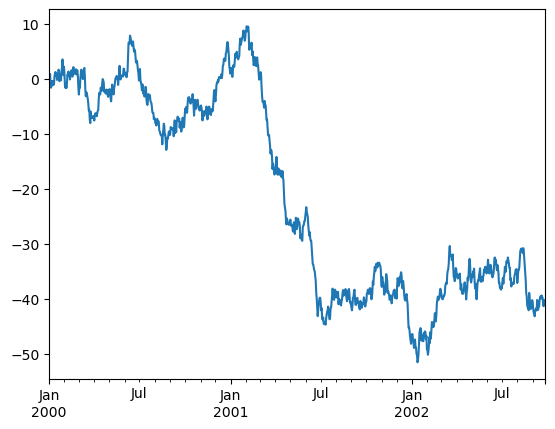

In [85]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

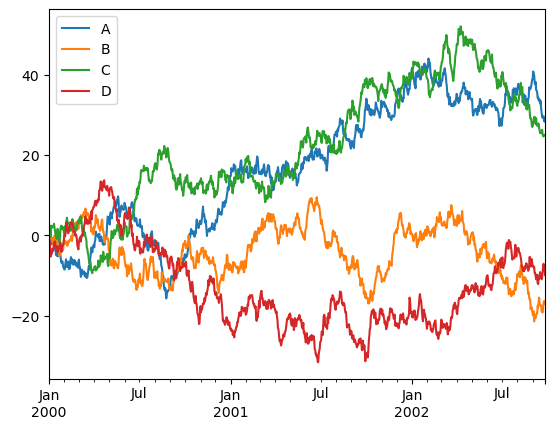

In [76]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')